# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

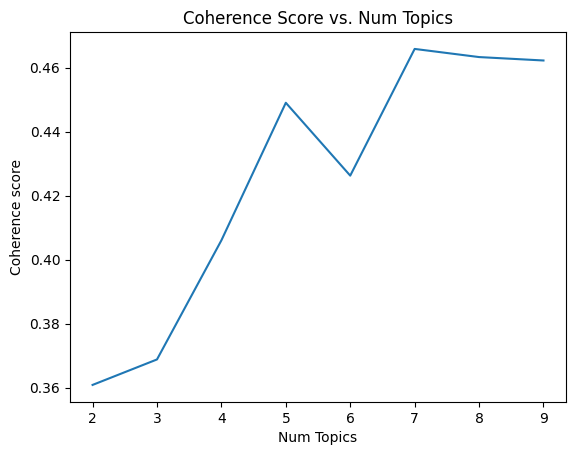

Num Topics = 2  has Coherence Value of 0.3609
Num Topics = 3  has Coherence Value of 0.3688
Num Topics = 4  has Coherence Value of 0.406
Num Topics = 5  has Coherence Value of 0.449
Num Topics = 6  has Coherence Value of 0.4262
Num Topics = 7  has Coherence Value of 0.4658
Num Topics = 8  has Coherence Value of 0.4633
Num Topics = 9  has Coherence Value of 0.4622
Optimal number of topics: 7
Topics:
Topic 1: ['for', 'purchase!', 'a', 'Get', 'next', 'more', 'your', 'discount', 'Click', 'on']
Topic 2: ['online', 'now!', 'cheap', 'viagra', 'Buy', 'today?', 'are', 'a', 'Your', 'is']
Topic 3: ['Buy', 'viagra', 'today?', 'Hi,', 'are', 'a', 'for', 'Reminder:', '$1000!', 'cheap']
Topic 4: ['viagra', 'today?', 'Buy', 'cheap', 'for', 'are', 'you', 'now!', 'a', 'how']
Topic 5: ['Buy', 'today?', 'viagra', 'for', 'a', 'are', 'Hi,', 'is', 'you', 'Your']
Topic 6: ['a', 'Congratulations!', 'tomorrow.', 'appointment', 'of', 'cash', 'prize', 'scheduled', 'for', "You've"]
Topic 7: ['doing', 'how', 'you', 

In [34]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# Sample data
data = [
    "Get a discount on your next purchase! Click here for more info.",
    "Congratulations! You've won a cash prize of $1000!",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Buy cheap viagra online now!",
    "Hi, how are you doing today?"
]

# Tokenize data
tokenized_data = [doc.split() for doc in data]

# Create dictionary and document-term matrix
dictionary = Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_data, start=2, limit=10, step=1)

# Plot coherence values
limit = 10
start = 2
step = 1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Num Topics")
plt.show()

# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

# Train LDA model with optimal number of topics
optimal_num_topics = coherence_values.index(max(coherence_values)) + start
lda_model = model_list[optimal_num_topics - start]

# Print topics with IDs
print("Optimal number of topics:", optimal_num_topics)
print("Topics:")
for topic_id in range(optimal_num_topics):
    topic_words = lda_model.show_topic(topic_id, topn=10)
    words = [word for word, _ in topic_words]
    print(f"Topic {topic_id + 1}: {words}")


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [35]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Num Topics = 2  has Coherence Value of 0.3303
Num Topics = 3  has Coherence Value of 0.3175
Num Topics = 4  has Coherence Value of 0.3407
Num Topics = 5  has Coherence Value of 0.3267
Num Topics = 6  has Coherence Value of 0.3335
Num Topics = 7  has Coherence Value of 0.3328


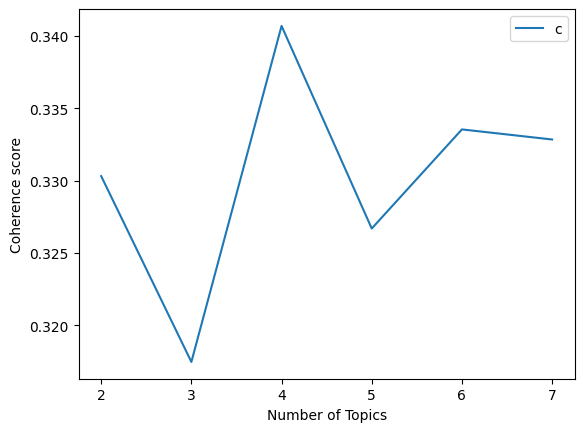

Topics:
Topic 1: a, for, Get, Click, discount, on, your, purchase!, info., here
Topic 2: prize, You've, Congratulations!, $1000!, of, won, cash, a, for, Your
Topic 3: scheduled, Reminder:, appointment, Your, tomorrow., is, for, discount, on, Click


In [36]:
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# Define email data
data = [
    "Get a discount on your next purchase! Click here for more info.",
    "Congratulations! You've won a cash prize of $1000!",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Buy cheap viagra online now!",
    "Hi, how are you doing today?"
]

# Load email data
def load_data(data):
    return [document.split() for document in data]

# Prepare corpus
def prepare_corpus(doc_clean):
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary, doc_term_matrix

# Create LSA model
def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)
    topics = lsamodel.show_topics(num_topics=number_of_topics, num_words=words, formatted=False)
    print("Topics:")
    for i, topic in enumerate(topics):
        print(f"Topic {i+1}: {', '.join([word for word, _ in topic[1]])}")
    return lsamodel

# Compute coherence values
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Num Topics = {num_topics}  has Coherence Value of {coherencemodel.get_coherence():.4f}")
    return model_list, coherence_values

# Plot coherence scores
def plot_graph(doc_clean, start, stop, step):
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

# Load email data
document_list = load_data(data)

# Plot coherence scores
start, stop, step = 2, 8, 1
plot_graph(document_list, start, stop, step)

# Determine the number of topics
number_of_topics = 3  # Adjust based on coherence score plot

# Create LSA model
words = 10
model = create_gensim_lsa_model(document_list, number_of_topics, words)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [37]:
!pip install lda2vec

  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14410 sha256=8166f1931b1472e8956c6ac9dd92ddb579319dcd18d09247844d086e91712865
  Stored in directory: /root/.cache/pip/wheels/1e/90/24/a97126c0fe8b479ba3bb79d3b18ebaab571a18d90bb2967ab6
Successfully built lda2vec


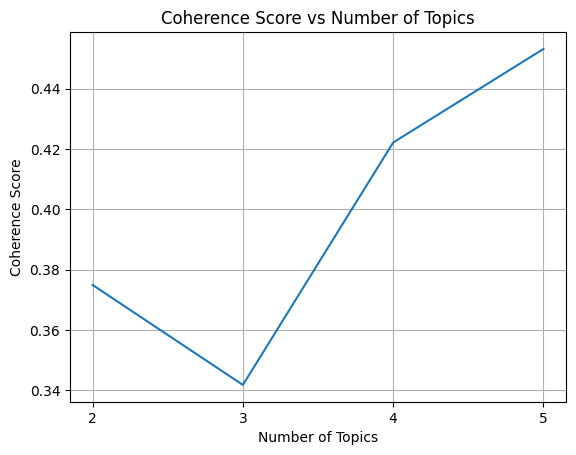

Num Topics = 2  has Coherence Value of 0.37488433670023225
Num Topics = 3  has Coherence Value of 0.34170188736292006
Num Topics = 4  has Coherence Value of 0.4221565773800861
Num Topics = 5  has Coherence Value of 0.45321726617652985
Best number of topics: 5
Best coherence score: 0.45321726617652985
Summarized Topics:
Topic 0: now!, viagra, cheap, buy, online
Topic 1: today?, doing, how, are, hi,
Topic 2: next, click, discount, info., on
Topic 3: a, won, cash, $1000!, congratulations!
Topic 4: for, your, scheduled, tomorrow., appointment


In [38]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = [
    "Get a discount on your next purchase! Click here for more info.",
    "Congratulations! You've won a cash prize of $1000!",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Buy cheap viagra online now!",
    "Hi, how are you doing today?"
]

# Tokenize the data and create a dictionary
tokenized_data = [doc.lower().split() for doc in data]
dictionary = corpora.Dictionary(tokenized_data)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Train the LDA model with different values of K
coherence_scores = []
for num_topics in range(2, 6):  # You can adjust the range of K as needed
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

    # Calculate coherence scores for each set of generated topics
    cm = CoherenceModel(model=lda_model, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_score = cm.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Choose the number of topics K that maximizes the coherence score
best_num_topics, best_coherence_score = max(coherence_scores, key=lambda x: x[1])

# Plotting the graph of coherence scores
num_topics, coherence_scores = zip(*coherence_scores)
plt.plot(num_topics, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.xticks(num_topics)
plt.grid(True)
plt.show()

# Print the number of topics and their coherence values
for num_topics, coherence_score in zip(num_topics, coherence_scores):
    print(f"Num Topics = {num_topics}  has Coherence Value of {coherence_score}")

# Print the best number of topics and their coherence score
print("Best number of topics:", best_num_topics)
print("Best coherence score:", best_coherence_score)

# Summarize the topics generated with the chosen value of K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_num_topics, passes=10)
topics = lda_model.print_topics(num_words=5)  # Adjust the number of words per topic as needed

# Print and summarize the topics
print("Summarized Topics:")
for topic_id, topic_words in topics:
    # Extract only the words from the topic string
    topic_words = [word.split("*")[1].strip().strip('"') for word in topic_words.split(" + ")]
    print(f"Topic {topic_id}: {', '.join(topic_words)}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [15]:
%%capture
!pip install bertopic

In [31]:
from bertopic import BERTopic
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import numpy as np

# Sample data
data = [
    "Get a discount on your next purchase! Click here for more info.",
    "Congratulations! You've won a cash prize of $1000!",
    "Reminder: Your appointment is scheduled for tomorrow.",
    "Buy cheap viagra online now!",
    "Hi, how are you doing today?"
]

# Convert data into a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Dimensionality reduction using TruncatedSVD
n_components = min(X.shape) - 1  # Ensure that n_components is smaller than the number of features
svd = TruncatedSVD(n_components=n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_reduced = lsa.fit_transform(X)

# Convert the transformed data into strings
X_reduced_strings = [" ".join(map(str, row)) for row in X_reduced]

# Initialize BERTopic model
topic_model = BERTopic(language="english")

# Fit BERTopic model
topics, _ = topic_model.fit_transform(X_reduced_strings)

# Summarize topics
topic_keywords = topic_model.get_topic_info()
print("Topic keywords:")
for topic_id in range(len(topic_keywords)):
    keywords = topic_keywords[topic_keywords['Topic'] == topic_id]['Words'].values[0]
    print(f"Topic {topic_id}: {keywords}")


/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [33]:
# Write your code here
"""
I could not compare all four topic modeling algorithms as I didn't get the output of the BERTopic algorithm.
Based on the results of the three algortihms (LDA, LSA, lda2vec), LDA is better.
Coherence score is one of the metric which evaluates how interpretable and coherent the topics are. The higher the coherence values indicates
the better defined topics.
Based on the coherence score results, LDA is having higher coherence scores compared to the LSA and lda2vec.
"""



"\nI could not compare all four topic modeling algorithms as I didn't get the output of the BERTopic algorithm.\nBased on the results of the three algortihms (LDA, LSA, lda2vec), LDA is better.\nCoherence score is one of the metric which evaluates how interpretable and coherent the topics are. The higher the coherence values indicates \nthe better defined topics.\nBased on the coherence score results, LDA is having higher coherence scores compared to the LSA and lda2vec.\n"

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [39]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Learned how to analyze text and find main topics using different methods such as LDA, LSA, BERT.
Tricky part is deciding how many topics to use. Method like BERTopic is more challenging for me in this exercise
where I worked on that particular method for almost 2-3 hours. Error is encountering again and again. I took the help of online resources too
but to failed to produce the output.
TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.
I tried reducing the k value and also the other method.
By organizing text into topics, we can do things like figure out opinions,
summarize articles, and sort documents automatically, which are all important in NLP.


'''

'\nLearned how to analyze text and find main topics using different methods such as LDA, LSA, BERT.\nTricky part is deciding how many topics to use. Method like BERTopic is more challenging for me in this exercise\nwhere I worked on that particular method for almost 2-3 hours. Error is encountering again and again. I took the help of online resources too\nbut to failed to produce the output.\nTypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.\nI tried reducing the k value and also the other method.\nBy organizing text into topics, we can do things like figure out opinions, \nsummarize articles, and sort documents automatically, which are all important in NLP. \n\n\n'